In [1]:
#Step 1, setup things needed
import pandas as pd
import json
#for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#statistics
import statistics as stat

In [2]:
#Steps in plan
#import stuff
#Wrangle data(done if you are okay with sub optimal perfection)

#Run it through model(not done with new data yet)

In [3]:
#Step 2, import the dataset that will be wrangled
with open("mpd.slice.0-999.json",'r') as json_file:
    data=json.load(json_file)

In [4]:
#3,
#Create library with artists and their genres
#1First stuff(load file)
with open("artists_0-999.json",'r') as json_file:
    df_2=json.load(json_file)
#2
artist_dict={"name":[],"genres":[]}
for ID in df_2:
    artist_dict["name"].append(df_2[ID]["name"])
    artist_dict["genres"].append(df_2[ID]["genres"])
#3
genre={"name":[],"genre":[]}
for ID in df_2:
    if df_2[ID]["genres"]==list:
        genre[df_2[ID]["name"]]=df_2[ID]["genres"]
    else:
        genre[df_2[ID]["name"]]=df_2[ID]["genres"]
    #make list of names in genre dict
    genre["name"].append(df_2[ID]["name"])
#function to find the genres
def getgenres(artist):
    return genre[artist]

In [5]:
#Step 4, This gives you top 5 most popular items in the list

from collections import Counter

def top5items(lst):
    # Count occurrences of each item
    counts = Counter(lst)
    # Get the top 5 most common items
    top_5 = [item for item, _ in counts.most_common(5)]
    return top_5

In [6]:
#Step 5, This is how you get the list of id and genres

#thislist.count("apple")
def getlistofstuff(playlist):
    templist=[playlist,data["playlists"][playlist]["num_followers"]]
    #test stuff that will be turned into function
    genrelist=[]
    playlist=data["playlists"][playlist]["tracks"]
    
    for taco in range(len(playlist)):
        #find if name in in list of genres so there is no error of no name
        if genre["name"].count(playlist[taco]["artist_name"])>0:
            currentgenres=getgenres(playlist[taco]["artist_name"])#so that there is no nested lists
            #search for lists(incomplete)
            
            for burrito in range(len(currentgenres)):                
                genrelist.append(currentgenres[burrito])
    top5=top5items(genrelist)
    for taco in range(len(top5)):
        templist.append(top5[taco])
    return(templist)

In [7]:
#Step 6, convert the data into numerical data



#makes a list of all genres that show up in a particular playlist
def getplaylist(playlist1):
    temp_list_2=[]
    for taco in range(len(data["playlists"][playlist1]["tracks"])):
        tempname=data["playlists"][playlist1]["tracks"][taco]["artist_name"]
        if genre["name"].count(tempname)>0:
            tempgen=genre[tempname]#the genres that will be appended
            if type(tempgen)==list:
                temp_list_2=temp_list_2+tempgen
            elif type(tempgen)==str:
                temp_list_2.append(tempgen)
    return temp_list_2
#creates the actual unordered list of things
def listofallgenres():
    tempplayliststuff=[]
    for playlist in range(len(data["playlists"])):
        tempplayliststuff=tempplayliststuff+getplaylist(playlist)
    #
    templibrary={}
    for taco in range(len(tempplayliststuff)):
        templibrary[str(tempplayliststuff[taco])]=0.0
    for taco in range(len(tempplayliststuff)):
        templibrary[str(tempplayliststuff[taco])]+=1.0
    #restructure the data
    otherlib={"Names":[],"Popularity":[]}
    for taco in templibrary:
        otherlib["Names"].append(taco)
        otherlib["Popularity"].append(float(templibrary[taco]))
    new_df=pd.DataFrame(otherlib)


    #tempplayliststuff=[]
    #tempolib={}
    #for taco in range(len(new_df["Names"])):
    #    tempolib[new_df["Popularity"][taco]]=[]
    #    tempplayliststuff.append(taco)
    #
    #for taco in range(len(new_df["Names"])):
    #    tempolib[new_df["Popularity"][taco]].append(tempplayliststuff[taco])


    
    new_df=new_df.sort_values(by='Popularity',ascending=False)
    new_df=pd.DataFrame(new_df).reset_index(drop=True)
    templength=len(new_df["Popularity"])
    for taco in range(templength):
        new_df["Popularity"][taco]=float((float(float(templength)-float(taco)-float(1.0)))/(float(2184.0)))
    for taco in range(len(new_df["Names"])):
        templibrary[new_df["Names"][taco]]=new_df["Popularity"][taco]



    
    #print(templibrary)
    return templibrary
genrenumber=listofallgenres()
def turndata(inputlist):
    templist=[]
    for taco in range(len(inputlist)):
        if inputlist[taco]==-1:
            templist.append(-1)
        else:
            templist.append(genrenumber[inputlist[taco]])
    return(templist)
#turndata(gen1)
#turndata: is the function that turns the music names into numbers

/private/tmp/PKInstallSandbox.1mwpZr/tmp/ipykernel_46592/165416343.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Popularity"][taco]=float((float(float(templength)-float(taco)-float(1.0)))/(float(2184.0)))
/private/tmp/PKInstallSandbox.1mwpZr/tmp/ipykernel_46592/165416343.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Popularity"][taco]=float((float(float(templength)-float(taco)-float(1.0)))/(float(2184.0)))
/private/tmp/PKInstallSandbox.1mwpZr/tmp/ipykernel_46592/165416343.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

In [8]:
#Step 7, get stuff for putting in dataframe

folw=[]
id_1=[]
gen1=[]
gen2=[]
gen3=[]
gen4=[]
gen5=[]
lfhdsbfksdnbkf=[]
for taco in range(len(data["playlists"])):
    list_temp=getlistofstuff(taco)
    if len(list_temp)==2:
        id_1.append(list_temp[0])
        folw.append(list_temp[1])
        gen1.append(-1)
        gen2.append(-1)
        gen3.append(-1)
        gen4.append(-1)
        gen5.append(-1)
    elif len(list_temp)==3:
        id_1.append(list_temp[0])
        folw.append(list_temp[1])
        gen1.append(list_temp[2])
        gen2.append(-1)
        gen3.append(-1)
        gen4.append(-1)
        gen5.append(-1)
    elif len(list_temp)==4:
        id_1.append(list_temp[0])
        folw.append(list_temp[1])
        gen1.append(list_temp[2])
        gen2.append(list_temp[3])
        gen3.append(-1)
        gen4.append(-1)
        gen5.append(-1)
    elif len(list_temp)==5:
        id_1.append(list_temp[0])
        folw.append(list_temp[1])
        gen1.append(list_temp[2])
        gen2.append(list_temp[3])
        gen3.append(list_temp[4])
        gen4.append(-1)
        gen5.append(-1)
    elif len(list_temp)==6:
        id_1.append(list_temp[0])
        folw.append(list_temp[1])
        gen1.append(list_temp[2])
        gen2.append(list_temp[3])
        gen3.append(list_temp[4])
        gen4.append(list_temp[5])
        gen5.append(-1)
    elif len(list_temp)==7:
        id_1.append(list_temp[0])
        folw.append(list_temp[1])
        gen1.append(list_temp[2])
        gen2.append(list_temp[3])
        gen3.append(list_temp[4])
        gen4.append(list_temp[5])
        gen5.append(list_temp[6])
    lfhdsbfksdnbkf.append(len(list_temp))


In [15]:
#Step 8, Make dataframe

temp_library={}
temp_library["id"]=id_1
#temp_library["follow"]=folw
temp_library["genre1"]=(turndata(gen1))
temp_library["genre2"]=(turndata(gen2))
temp_library["genre3"]=(turndata(gen3))
temp_library["genre4"]=(turndata(gen4))
temp_library["genre5"]=(turndata(gen5))
pivotDF=pd.DataFrame(temp_library)#(not actually pivoted, just so that I dont have to change the code)

In [ ]:
#actual stuff with the make stuff

In [17]:
#Step 1, import
from sklearn.cluster import MiniBatchKMeans

In [ ]:

kb = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=6)

In [ ]:
kb = kb.fit(pivotDF)

In [ ]:
kb.cluster_centers_

In [18]:
#Step 2, import again
from sklearn.metrics import silhouette_score

In [ ]:
ss = silhouette_score(pivotDF, kb.labels_)

In [ ]:
ss

/Volumes/DockSSD/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Volumes/DockSSD/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Volumes/DockSSD/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Volumes/DockSSD/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

<Axes: xlabel='k', ylabel='Score'>

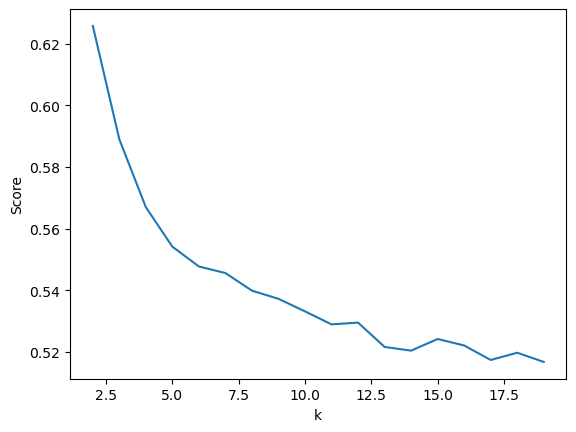

In [19]:
#Step 3, get silhouette scores and test different cluster amounts, you should try different batch sizes
scores = {"k":[],"Score":[]}
batch=100
for i in range(1, 20):
    kb = MiniBatchKMeans(n_clusters=i, random_state=0, batch_size=batch)
    kb = kb.fit(pivotDF)
    if(len(set(kb.labels_)) > 1):
        ss = silhouette_score(pivotDF, kb.labels_)
        scores["k"].append(i)
        scores["Score"].append(ss)
scores_df=pd.DataFrame(scores)
import seaborn as sns
sns.lineplot(data=scores_df,x="k",y="Score")

In [ ]:
scores_df["k"][1]

In [ ]:
scores

In [ ]:
kb = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=100)
kb = kb.fit(pivotDF)

In [ ]:
pivotDF['Cluster'] = kb.labels_

In [ ]:
pivotDF.head(10)

In [ ]:
with open("Vetting_Playlist.json",'r') as json_file:
    teacherdata=json.load(json_file)

In [ ]:
teacher

In [ ]:
#function to find the genres(notused)
def getplayistgenres(playlists_df,playlist):
    playlist=data["playlists"][playlist]
    
    
    
    
    
    return foundgenres

In [ ]:
from collections import Counter

def top_5_most_common_items_with_count(lst):
    # Count occurrences of each item
    counts = Counter(lst)
    # Get the top 5 most common items
    top_5 = counts.most_common(5)
    return top_5


In [ ]:
min(lfhdsbfksdnbkf)

In [ ]:
playlist

In [ ]:

data["playlists"][1]
playcorrect={}
for playlist in range(len(data["playlists"])):
    #playcorrect[playlist], create temporary library so that I can put some data in it
    lib={"artist":[],"genre":[]}
    for songinplaylist in range(len(data["playlists"][playlist]["tracks"])):
        #Artist name:data["playlists"][playlist]["tracks"][songinplaylist]["artist_name"]
        name=data["playlists"][playlist]["tracks"][songinplaylist]["artist_name"]#get the artist's name so that you can get the genres and put them in
        #check if the name is in the list, and if so you add to the list of genres, either way you add the name to the artistlist:
        if name in genre:
            lib["genre"].append(genre[name])
        lib["artist"].append(name)
    #find the most likely top genres
    unique=lib["genre"].unique()
    
#print(artistslist)
#print(artistslist)
        #artistlist.append(data["playlists"][playlist]["tracks"][songinplaylist]["artist_name"])

In [ ]:
data["playlists"][0]["tracks"][0]["artist_name"]

In [ ]:
with open("songs_0-999.json",'r') as json_file:
    jsongs=json.load(json_file)


In [ ]:
#for taco in jsongs:
#    print(taco)
#jsongs["0UaMYEvWZi0ZqiDOoHU3YI"]

In [ ]:
x=[]
#df_playlist=pd.DataFrame(data)
#you get a list of all of the artists(x) in order
for playlist in range(len(data["playlists"])):
    for song in range(len(data["playlists"][playlist]["tracks"])):
        x.append(data["playlists"][playlist]["tracks"][song]["artist_name"])
#jsongs["0UaMYEvWZi0ZqiDOoHU3YI"]

In [ ]:
#data["playlists"][0]["tracks"][0]["artist_name"]

In [ ]:
#Not official stuff, just for looking
y=[]
for taco in range(len(data["playlists"])):
    y.append(len(data["playlists"][taco]["tracks"]))
df=pd.DataFrame({"x":range(1,len(y)+1),"y":sorted(y)})#sorted(y)

sns.lineplot(data=df,x='x',y='y')
plt.xlabel("x")
plt.ylabel("y")
stat.mean(y)
print(min(y))

In [ ]:
#len(data["playlists"][taco]["tracks"])

In [ ]:
#make variable called artist so that you can then make a dataframe that has songs and the genre
#for taco in range(len(data["playlists"])):
#    for burrito in range(len(data["playlists"][taco]["tracks"])):
#        artist=data["playlists"][taco]["tracks"][burrito]["artist_name"]

In [ ]:
#x=data["playlists"][0]["tracks"]
#x
#for hotdog in range(len(x)):
#    data["playlists"][0]["tracks"][hotdog]["artist_name"]
#
#[0]["artist_name"]

In [ ]:
#example library
library={
    "playlist1":[["Song","Artist",["Pop","rock"]],["Song","Artist",["Pop","rock"]]] 
}

In [ ]:
#next few are for sorting listofgenres
fullgenrelistunsorted=listofallgenres()
new_df=fullgenrelistunsorted
#Not trash, but just testing
tempplayliststuff=[]
tempolib={}
for taco in range(len(new_df["Names"])):
    tempolib[new_df["Popularity"][taco]]=[]
    tempplayliststuff.append(taco)

for taco in range(len(new_df["Names"])):
    tempolib[new_df["Popularity"][taco]].append(tempplayliststuff[taco])
#make list of just different popularities#
pop=[]
for taco in new_df["Popularity"]:
    pop.append(taco)
newlist=[]
for taco in range(len(pop)):
    popularity=new_df["Popularity"][taco]
    if len(tempolib[popularity])>1:
        #get your max and min values
        if taco>0:
            max=pop[taco-1]
        if taco+1<len(pop)-1:
            min=pop[taco+1]
        else:
            min=0
        list1=tempolib[popularity]
        list2=[]
        length=len(list1)
        for taco in range(length):
            list2.append(taco*(max-min)/length+min)
            newlist.append(taco*(max-min)/length+min)
    else:
        newlist.append(popularity)
#newlist is a currently not working list of values


#Trash

for taco in range(len(new_df["Names"])):
    tempstuff=new_df["Popularity"][taco]
    if len(tempolib[new_df["Popularity"][taco]])>1:
        if tempstuff+1<len(new_df["Popularity"])-1:
            min=new_df_2[tempstuff+1]
        if tempstuff>1:
            max=new_df_2[tempstuff-1]

In [ ]:
tempolib

In [ ]:
data_art

In [ ]:
pip show pandas

In [ ]:
#Trash
#This is for converting genres into numerical data
from collections import Counter

def replace_with_popularity(lst):
    # Count occurrences of each item except -1
    counts = Counter(item for item in lst if item != -1)
    # Sort items by popularity (frequency)
    sorted_items = sorted(counts, key=lambda x: counts[x], reverse=True)
    # Create a dictionary to map items to popularity numbers
    popularity_map = {item: rank + 1 for rank, item in enumerate(sorted_items)}
    # Replace items with popularity numbers, preserving -1 values
    popularity_numbers = [popularity_map.get(item, -1) for item in lst]
    return popularity_numbers

# Example usage:
your_list = ['a', 'b', 'c', 'a', 'b', 'a', 'd', 'e', 'e', 'e', -1, -1]  # Your list of items with some -1 values
popularity_numbers = replace_with_popularity(your_list)
print("Popularity numbers:", popularity_numbers)


In [ ]:
#Trash
#make the lists numerical

lists = [gen1,gen2,gen3,gen4,gen5]
from collections import Counter

def map_values_based_on_frequency(lists):
    # Flatten the lists into one single list
    flat_list = [item for sublist in lists for item in sublist if item != -1]
    
    # Count the frequency of each string value
    frequencies = Counter(flat_list)
    
    # Sort the values by frequency in descending order
    sorted_values = sorted(frequencies, key=frequencies.get, reverse=True)
    
    # Create a mapping of string values to numerical values based on frequency
    value_mapping = {value: i + 1 for i, value in enumerate(sorted_values)}
    
    # Create a library to store original values for each numerical value
    original_values = {value_mapping[key]: [] for key in value_mapping}
    
    for sublist in lists:
        for item in sublist:
            if item != -1:
                mapped_value = value_mapping[item]
                if item not in original_values[mapped_value]:
                    original_values[mapped_value].append(item)
    
    return value_mapping, original_values

def transform_lists(lists, value_mapping):
    transformed_lists = []
    for l in lists:
        transformed_list = [value_mapping[item] if item in value_mapping else item for item in l]
        transformed_lists.append(transformed_list)
    return transformed_lists

# Example lists


# Get value mapping based on frequency and original values library
value_mapping, original_values = map_values_based_on_frequency(lists)

# Transform the lists using the value mapping
transformed_lists = transform_lists(lists, value_mapping)

# Print the transformed lists
for l in transformed_lists:
    print(l)

# Print the original values library
print("\nOriginal Values:")
for key, value in original_values.items():
    print(f"{key}: {value}")
#original_values is the list